## Imports

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

## Singular Value Decomposition (SVD)

In [2]:
# Singular Value Decomposition (SVD) Module
class SVD:
    def __init__(self, A):
        self.A = A
    
    # Returns U, S and VT of SVD in Decreasing Order of Singular values (S).
    def apply_svd(self):
        """
            U: Left singular vectors
            S: Singular values (as a 1D array)
            VT: Right singular vectors (transposed)
        """
        U, S, VT = np.linalg.svd(self.A)
        return U, S, VT
    
    # Prints SVD Decomposition matrices U, S and VT.
    def print_svd(self):
        U, S, VT = self.apply_svd()
        print(f"U (Dimensions: {U.shape}):\n", U)
        print(f"S (Dimensions: {S.shape}):\n", S)
        print(f"VT (Dimensions: {VT.shape}):\n", VT)
    
    # Returns the ith left singular vector from the U matrix (1-based indexing).
    def get_left_singular_vector(self, ind=1):
        U, _, _ = self.apply_svd()
        if ind < 1 or ind > U.shape[1]:
            raise IndexError(f"Index {ind} is out of bounds for the left singular vectors. Valid range: 1 to {U.shape[1]}.")
        return U[:, ind - 1]
    
    # Returns the ith right singular vector from the VT matrix (1-based indexing).
    def get_right_singular_vector(self, ind=1):
        _, _, VT = self.apply_svd()
        if ind < 1 or ind > VT.shape[0]:
            raise IndexError(f"Index {ind} is out of bounds for the right singular vectors. Valid range: 1 to {VT.shape[0]}.")
        return VT[ind - 1, :]

### Testing SVD module

In [3]:
A = np.random.randint(1, 101, size=(12, 9))
print(A)

svd = SVD(A)
svd.print_svd()

left_vector = svd.get_left_singular_vector(1)
print(f"left vector: {left_vector}")

right_vector = svd.get_right_singular_vector(1)
print(f"right vector: {right_vector}")

[[  5  18  75  37  80  10  97  87  30]
 [ 17  65  11  47  76  35  20  29  82]
 [ 71  36  41  54  79  63  17  16  90]
 [ 87 100  78  73  87  87  70  18  84]
 [ 45  19  58  93  29  73  98  11  38]
 [ 52  13  34  62   4  50  20  56  50]
 [ 63   5  54  55  80  83  17  88  18]
 [ 67   6  36  71  11  99  82 100  69]
 [  5  10  28   2  92   4  59   8  32]
 [  1  72  26  74  34  57   3  59  85]
 [ 83  15  18  37  68  91  54  65  75]
 [ 89  69  61  14   9  53  93  78  58]]
U (Dimensions: (12, 12)):
 [[-0.26321173  0.14394569  0.67897009 -0.18635286  0.35686858  0.06641559
  -0.09393043 -0.2466924  -0.01063752  0.06509273 -0.08574275 -0.44846753]
 [-0.23287744 -0.45180162 -0.03435714 -0.10837491  0.24478925 -0.06080201
   0.24517232  0.14664348 -0.67640832 -0.01151846 -0.33491657  0.11685641]
 [-0.291665   -0.33637859 -0.16024512 -0.06491533 -0.31193157 -0.03987018
   0.07216794 -0.61840009  0.30452691  0.24695491 -0.36246015  0.01642943]
 [-0.41321661 -0.34942703 -0.00976037  0.41527603 -0.1732

## Calculating 2D Homography Matrix (H : 3*3)

In [4]:
# Calculates Homography matrix using various methods
class HomographyMatrix:
    def __init__(self, A):
        _, cols = A.shape
        if cols != 9:
            raise ValueError("Expected number of columns is 9, but got {cols}")
        self.A = A
    
    # Returns Homography Matrix of size (3, 3) using Homography vector 
    def get_homography_matrix(self):
        pass
    
    # Prints Homography matrix
    def print_homography_matrix(self):
        pass

## Direct Linear Transformation (DLT) : SVD Based solution

In [5]:
class DirectLinearTransformation(HomographyMatrix):
    def __init__(self, A):
        super().__init__(A)

    # Returns Homography Vector, which is right singular vector of A corresponding to smallest Eigen value.
    def get_homography_vector(self):
        svd = SVD(self.A)
        _, cols = self.A.shape
        homography_vector = svd.get_right_singular_vector(cols)
        if len(homography_vector) != 9:
            raise ValueError(f"Expected length of 9, but got {len(homography_vector)}")
        return homography_vector

    # Returns Homography Matrix of size (3, 3) using Homography vector 
    def get_homography_matrix(self):
        homography_vector = self.get_homography_vector()
        homography_matrix = homography_vector.reshape(3, 3)
        return homography_matrix

    # Prints Homography vector
    def print_homography_vector(self):
        homography_vector = self.get_homography_vector()
        print(f"Homography vector (Dimensions: {homography_vector.shape}):\n", homography_vector)

    # Prints Homography matrix
    def print_homography_matrix(self):
        homography_matrix = self.get_homography_matrix()
        print(f"Homography matrix (Dimensions: {homography_matrix.shape}):\n", homography_matrix)

### Testing DLT

In [6]:
dlt = DirectLinearTransformation(A)
dlt.print_homography_matrix()

Homography matrix (Dimensions: (3, 3)):
 [[-0.39332211 -0.16996191  0.52149347]
 [-0.4504195  -0.12306027  0.47414819]
 [-0.09522692 -0.1316342   0.27426528]]


## Normalized DLT

In [7]:
class NormalizedDLT(HomographyMatrix):
    def __init__(self, A):
        super().__init__(A)

    # Returns Homography Vector, which is right singular vector of A corresponding to smallest Eigen value.
    def get_homography_vector(self):
        # Normalize A here
        svd = SVD(self.A)
        _, cols = self.A.shape
        homography_vector = svd.get_right_singular_vector(cols)
        if len(homography_vector) != 9:
            raise ValueError(f"Expected length of 9, but got {len(homography_vector)}")
        return homography_vector

    # Returns Homography Matrix of size (3, 3) using Homography vector 
    def get_homography_matrix(self):
        homography_vector = self.get_homography_vector()
        homography_matrix = homography_vector.reshape(3, 3)
        return homography_matrix

    # Prints Homography vector
    def print_homography_vector(self):
        homography_vector = self.get_homography_vector()
        print(f"Homography vector (Dimensions: {homography_vector.shape}):\n", homography_vector)

    # Prints Homography matrix
    def print_homography_matrix(self):
        homography_matrix = self.get_homography_matrix()
        print(f"Homography matrix (Dimensions: {homography_matrix.shape}):\n", homography_matrix)

## Symmetric Distance Error

In [8]:
class SymmetricDistanceError(HomographyMatrix):
    def __init__(self, A):
        super().__init__(A)

    # Returns Homography Matrix of size (3, 3) using Homography vector 
    def get_homography_matrix(self):
        pass

    # Prints Homography matrix
    def print_homography_matrix(self):
        pass

## Re-projection Error

In [9]:
class ReProjectionError(HomographyMatrix):
    def __init__(self, A):
        super().__init__(A)

    # Returns Homography Matrix of size (3, 3) using Homography vector 
    def get_homography_matrix(self):
        pass

    # Prints Homography matrix
    def print_homography_matrix(self):
        pass

## Sampson Error

In [10]:
class SampsonError(HomographyMatrix):
    def __init__(self, A):
        super().__init__(A)

    # Returns Homography Matrix of size (3, 3) using Homography vector 
    def get_homography_matrix(self):
        pass

    # Prints Homography matrix
    def print_homography_matrix(self):
        pass

## RANSAC (Random Sample Consensus) for Homography Matrix

In [11]:
class RansacHomography:
    def __init__(self, data):
        self.data = data

    # Returns Homography Matrix of size (3, 3) using Homography vector 
    def get_ransac_homography_matrix(self):
        pass

    # Prints Homography matrix
    def print_ransac_homography_matrix(self):
        pass

## Homography Estimation using Data

In [14]:
class HomographyEstimation:
    def __init__(self, data):
        """data contains pairs of matching points: 
        1. (x1, y1): matched 2D point in first image
        2. (x2, y2): matched 2D point in second image
        Note: 1. HX1 = X2
              2. data should have atleast 4 pairs of matching points to calculate Projection matrix.
        """
        total_pairs = len(data)
        if total_pairs < 4:
            raise ValueError(f"Expected at least 4 pairs of matching points, but got {total_pairs}")
        self.data = data

    def get_data_matrix(self):
        data_matrix = []
        for (x1, y1), (x2, y2) in self.data:
            # First row for each pair
            row1 = [
                x1, y1, 1,
                0, 0, 0,
                -x2 * x1, -x2 * y1, -x2
            ]
            # Second row for each pair
            row2 = [
                0, 0, 0, 
                x1, y1, 1,
                -y2 * x1, -y2 * y1, -y2
            ]
            data_matrix.append(row1)
            data_matrix.append(row2)
        return np.array(data_matrix)
    
    def print_data_matrix(self):
        data_matrix = self.get_data_matrix()
        print(f"Data matrix - A (Dimensions: {data_matrix.shape}):\n", data_matrix)
    
    def get_homography_matrix(self):
        data_matrix = self.get_data_matrix()
        homo_mat_obj = DirectLinearTransformation(data_matrix)
        homography_matrix = homo_mat_obj.get_homography_matrix()
        return homography_matrix
    
    def print_homography_matrix(self):
        data_matrix = self.get_data_matrix()
        homo_mat_obj = DirectLinearTransformation(data_matrix)
        homo_mat_obj.print_homography_matrix()

### Homography Estimation Testing

In [19]:
matching_points = [
    ((100, 150), (140, 200)),
    ((120, 160), (160, 210)),
    ((130, 170), (170, 220)),
    ((140, 180), (180, 230)),
    ((150, 190), (190, 240)),
    ((160, 200), (200, 250)),
    ((170, 210), (210, 260)),
    ((180, 220), (220, 270)),
    ((190, 230), (230, 280)),
    ((200, 240), (240, 290))
]

homo_est = HomographyEstimation(matching_points)
homo_est.print_homography_matrix()
homography_matrix = homo_est.get_homography_matrix()

Homography matrix (Dimensions: (3, 3)):
 [[-1.49073834e-02  7.98997596e-03 -5.96295338e-01]
 [-1.14142514e-02  4.49684388e-03 -8.02440429e-01]
 [-5.70712568e-05  5.70712568e-05 -9.20025776e-03]]


## Data Generation for Homography Calculation

In [22]:
def open_and_display_image(img_path):
    img = Image.open(img_path)
    width, height = img.size
    print("width:",width, ",height:", height)
    plt.imshow(img)

def plot_points_on_image(image_path, points):
    img = Image.open(image_path)
    plt.imshow(img)
    for index, (u, v) in enumerate(points, start=1):
        plt.scatter(u, v, color='red', s=5)
        plt.text(u, v, str(index), color='white', fontsize=12, ha='right', va='bottom')
    plt.show()

def get_data(first_image_points, second_image_points):
    if len(first_image_points) != len(second_image_points):
        raise ValueError("Lists are of different sizes.")
    
    data = list(zip(first_image_points, second_image_points))
    return data

def project_point(first_image_point, homography_matrix):
    homogeneous_point = np.array([*first_image_point, 1])
    homography_matrix = np.array(homography_matrix)
    projected_point = homography_matrix @ homogeneous_point
    u = projected_point[0] / projected_point[2]
    v = projected_point[1] / projected_point[2]
    return (u, v)

In [21]:
project_point((190, 230), homography_matrix)

(230.000000000012, 280.00000000000455)

### Generating Data Manually

width: 1864 ,height: 4096


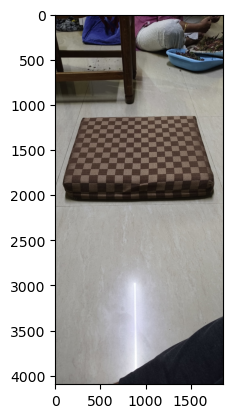

In [24]:
first_image_path = r"C:\Users\suyash\OneDrive - iiit-b\Sem7\3D Vision\Assignments\3D_Vision_Camera_Calibration_and_Homography_Estimation\Homography_Estimation\pattern_view1.jpg"
open_and_display_image(first_image_path)

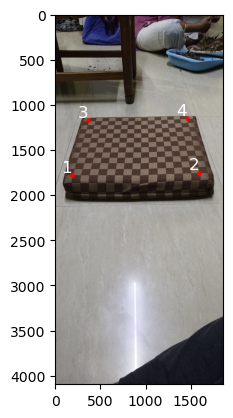

In [58]:
first_image_points = [
    (180, 1780),
    (1597, 1750),
    (365, 1170),
    (1455, 1150)
]

plot_points_on_image(first_image_path, first_image_points)

width: 1864 ,height: 4096


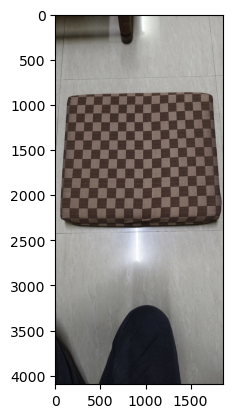

In [25]:
second_image_path = r"C:\Users\suyash\OneDrive - iiit-b\Sem7\3D Vision\Assignments\3D_Vision_Camera_Calibration_and_Homography_Estimation\Homography_Estimation\pattern_view2.jpg"
open_and_display_image(second_image_path)

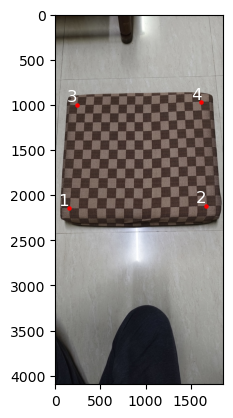

In [80]:
second_image_points = [
    (150, 2140),
    (1675, 2115),
    (240, 995),
    (1620, 965)
]

plot_points_on_image(second_image_path, second_image_points)

In [81]:
matching_points1 = get_data(first_image_points, second_image_points)

homo_est1 = HomographyEstimation(matching_points1)
homo_est1.print_homography_matrix()
homography_matrix1 = homo_est1.get_homography_matrix()

Homography matrix (Dimensions: (3, 3)):
 [[-6.23997171e-04 -1.37548543e-04  2.69275375e-01]
 [-4.10393314e-06 -1.24499189e-03  9.63062150e-01]
 [ 2.58670235e-09 -1.43979498e-07 -3.30052250e-04]]


### Validating Calculated Homography matrix

In [82]:
print(matching_points1)

[((180, 1780), (150, 2140)), ((1597, 1750), (1675, 2115)), ((365, 1170), (240, 995)), ((1455, 1150), (1620, 965))]


In [95]:
ind = 0
projected_point1 = project_point(first_image_points[ind], homography_matrix1)
print("Projected point:", projected_point1)
print("Actual point:", second_image_points[ind])

ind = 1
projected_point1 = project_point(first_image_points[ind], homography_matrix1)
print("Projected point:", projected_point1)
print("Actual point:", second_image_points[ind])

Projected point: (149.99999999995117, 2140.0000000000286)
Actual point: (150, 2140)
Projected point: (1674.999999999935, 2114.9999999993224)
Actual point: (1675, 2115)


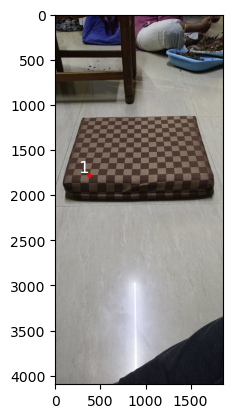

In [90]:
first_image_validation_points = [
    (375, 1775)
]

plot_points_on_image(first_image_path, first_image_validation_points)

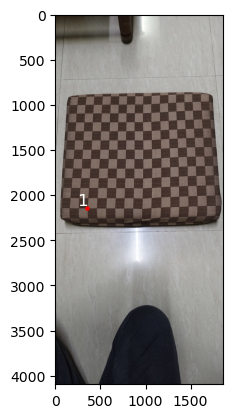

In [94]:
second_image_validation_points = [
    (355, 2140)
]

plot_points_on_image(second_image_path, second_image_validation_points)

In [96]:
ind = 0
projected_point1 = project_point(first_image_validation_points[ind], homography_matrix1)
print("Projected point:", projected_point1)
print("Actual point:", second_image_validation_points[ind])

Projected point: (357.2628280901852, 2135.202769351691)
Actual point: (355, 2140)
